# Testing and comparing Auto Augmentation techniques
***
Matthieu Olekhnovitch - SnT - University of Luxembourg

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('results/logs.csv')

In [49]:
df.columns

Index(['dataset', 'num_classes', 'num_train_samples', 'num_test_samples',
       'vae_best_acc', 'vae_best_f1', 'vae_augmented_best_acc',
       'vae_augmented_best_f1', 'vae_augmented_augmented_best_acc',
       'vae_augmented_augmented_best_f1',
       'vae_augmented_augmented_augmented_best_acc',
       'vae_augmented_augmented_augmented_best_f1', 'classifier_best_acc',
       'classifier_best_f1', 'classifier_augmented_best_acc',
       'classifier_augmented_best_f1',
       'classifier_augmented_augmented_best_acc',
       'classifier_augmented_augmented_best_f1',
       'classifier_augmented_augmented_augmented_best_acc',
       'classifier_augmented_augmented_augmented_best_f1'],
      dtype='object')

In [50]:
#Add a column for the overall best augmented vae accuracy
df['best_augmented_vae_accuracy'] = df[['vae_augmented_best_acc', 'vae_augmented_augmented_best_acc', 'vae_augmented_augmented_augmented_best_acc']].max(axis=1)
df['best_augmented_classifier_accuracy'] = df[['classifier_augmented_best_acc', 'classifier_augmented_augmented_best_acc', 'classifier_augmented_augmented_augmented_best_acc']].max(axis=1)
df['best_overall_accuracy'] = df[['best_augmented_vae_accuracy', 'best_augmented_classifier_accuracy']].max(axis=1)
df['percentage_improvement_vae'] = (df['best_augmented_vae_accuracy'] - df['vae_best_acc']) / df['vae_best_acc'] * 100
df['percentage_improvement_classifier'] = (df['best_augmented_classifier_accuracy'] - df['classifier_best_acc']) / df['classifier_best_acc'] * 100
df['percentage_improvement_overall'] = (df['best_overall_accuracy'] - df[['vae_best_acc', 'classifier_best_acc']].max(axis=1)) / df[['vae_best_acc', 'classifier_best_acc']].max(axis=1) * 100

In [51]:
# print dataset names where the percentage improvement is lower than 10%
print(df[df['percentage_improvement_classifier'] < -10]['dataset'])

Series([], Name: dataset, dtype: object)


<Figure size 640x480 with 0 Axes>

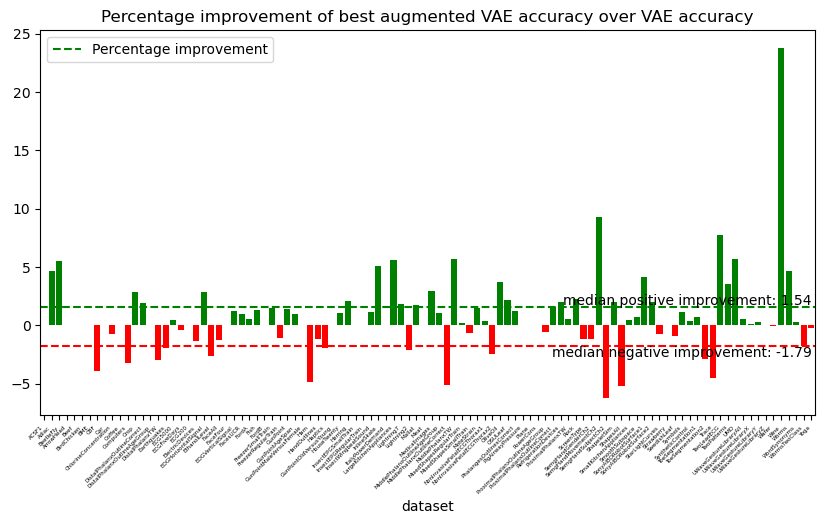

<Figure size 640x480 with 0 Axes>

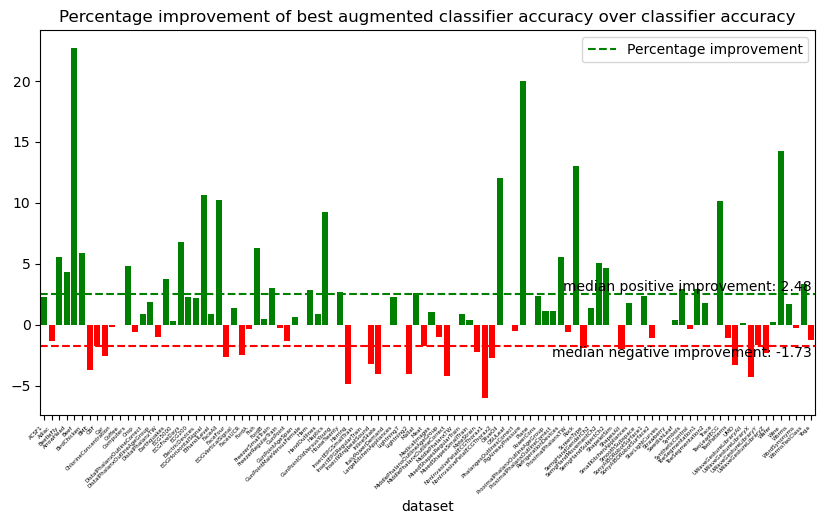

In [55]:
plt.figure()
ax = df.plot(x='dataset', y=['percentage_improvement_vae'], kind='bar', title='Percentage improvement of best augmented VAE accuracy over VAE accuracy', figsize=(10, 5))
ax.set_xticklabels(df['dataset'], rotation=45, ha='right', fontsize=4)  # Adjust the fontsize as per your preference

# Color negative percentages in red and positive percentages in green
colors = ['red' if p < 0 else 'green' for p in df['percentage_improvement_vae']]
ax.bar(df.index, df['percentage_improvement_vae'], color=colors)

# Calculate mean positive percentage improvement
mean_positive_improvement = df[df['percentage_improvement_vae'] > 0]['percentage_improvement_vae'].mean()

# Calculate mean negative percentage improvement
mean_negative_improvement = df[df['percentage_improvement_vae'] < 0]['percentage_improvement_vae'].mean()

# Plot the mean positive percentage improvement
plt.axhline(y=mean_positive_improvement, color='g', linestyle='--')
plt.text(len(df) - 1, mean_positive_improvement, f'Mean positive improvement: {mean_positive_improvement:.2f}', ha='right', va='bottom')

# Plot the mean negative percentage improvement
plt.axhline(y=mean_negative_improvement, color='r', linestyle='--')
plt.text(len(df) - 1, mean_negative_improvement, f'Mean negative improvement: {mean_negative_improvement:.2f}', ha='right', va='top')

plt.legend(['Percentage improvement'])
plt.show()

plt.figure()
ax = df.plot(x='dataset', y=['percentage_improvement_classifier'], kind='bar', title='Percentage improvement of best augmented classifier accuracy over classifier accuracy', figsize=(10, 5))
ax.set_xticklabels(df['dataset'], rotation=45, ha='right', fontsize=4)  # Adjust the fontsize as per your preference

# Color negative percentages in red and positive percentages in green
colors = ['red' if p < 0 else 'green' for p in df['percentage_improvement_classifier']]
ax.bar(df.index, df['percentage_improvement_classifier'], color=colors)

# Calculate mean positive percentage improvement
mean_positive_improvement = df[df['percentage_improvement_classifier'] > 0]['percentage_improvement_classifier'].mean()

# Calculate mean negative percentage improvement
mean_negative_improvement = df[df['percentage_improvement_classifier'] < 0]['percentage_improvement_classifier'].mean()

# Plot the mean positive percentage improvement
plt.axhline(y=mean_positive_improvement, color='g', linestyle='--')

plt.text(len(df) - 1, mean_positive_improvement, f'Mean positive improvement: {mean_positive_improvement:.2f}', ha='right', va='bottom')

# Plot the mean negative percentage improvement
plt.axhline(y=mean_negative_improvement, color='r', linestyle='--')
plt.text(len(df) - 1, mean_negative_improvement, f'Mean negative improvement: {mean_negative_improvement:.2f}', ha='right', va='top')

plt.legend(['Percentage improvement'])
plt.show()

